# <span style="color:green">Plancton Images Classifier</span>
*von Bourges Julian, Hahn Sandro, Schmalzl Maximilian*

Definition: 
Plankton ist die Bezeichnung für die Gesamtheit der Organismen, die im Wasser von Meeren, Flüssen und Seen leben. Sie bewegen sich nicht oder nur sehr wenig aus eigener Kraft, weshalb deren Schwimmrichtung von der Strömung vorgegeben wird.

## <span style="color:rgb(166, 212, 46)">I. Daten-Aufbereitung</span>

 




Unser Datensatz "Converted" besteht aus 219 063 .png Dateien. Jede einzelne .png bildet ein Plankton ab. Um mit diesem Datensatz arbeiten zu können, müssen die einzelnen Daten, also die .png Bilder, zunächst aufbereitet und skaliert werden. <br> 
Da Java-Code direkt in Maschinencode kompiliert wird, ist er in der Regel schneller. Unsere Daten haben wir deshalb zunächst mit Java genauer betrachtet und aufbereitet. 

Um einen Eindruck von der Größe der Bilder zu bekommen haben wir mit der getPercentages()-Funktion die Anzahl der Pixel berechnet, in die die einzelnen Bilder jeweils in Höhe und Breite skaliert sind. Anschließend haben wir die Bilder mit 0 - 99, 100 - 199, ... und 1300 - 1399 Pixeln zu Gruppen zusammengefast und uns die jeweilige Repräsentation der Gruppe in Prozent ausgeben lassen.

In [ ]:
public static void getPercentages() {

        DecimalFormat df = new DecimalFormat("0.00");
        int sum = 0;

        for(int entry : WIDTHS_ARR) {
            sum += entry;
        }

        System.out.println("Widths:");

        for(int i = 0; i < WIDTHS_ARR.length; i++) {
            double percent = ((double) WIDTHS_ARR[i] / sum) * 100.0D;
            System.out.println(i + ": " + WIDTHS_ARR[i] + " (" + df.format(percent) + "%)");
        }

        System.out.println();
        System.out.println("Heights:");

        for(int i = 0; i < HEIGHTS_ARR.length; i++) {
            double percent = ((double) HEIGHTS_ARR[i] / sum) * 100.0D;
            System.out.println(i + ": " + HEIGHTS_ARR[i] + " (" + df.format(percent) + "%)");
        }

    }



Die getPercentages() Funktion erzeugt folgenden Output (ersichtlicher dargestellt in einer Tabelle): 

<table>
  <tr>
    <th>Widths</th>
    <th>Counts</th>
    <th></th>
    <th>Heights</th>
    <th>Counts</th>
  </tr>
  <tr>
    <td>0</td>
    <td>21592 (9,86%)</td>
    <td></td>
    <td>0</td>
    <td>19926 (9,10%)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>72812 (33,24%)</td>
    <td></td>
    <td>1</td>
    <td>60609 (27,67%)</td>
  </tr>
  <tr>
    <td>2</td>
    <td>93711 (42,78%)</td>
    <td></td>
    <td>2</td>
    <td>99519 (45,43%)</td>
  </tr>
  <tr>
    <td>3</td>
    <td>15954 (7,28%)</td>
    <td></td>
    <td>3</td>
    <td>19706 (9,00%)</td>
  </tr>
  <tr>
    <td>4</td>
    <td>7324 (3,34%)</td>
    <td></td>
    <td>4</td>
    <td>9451 (4,31%)</td>
  </tr>
  <tr>
    <td>5</td>
    <td>3609 (1,65%)</td>
    <td></td>
    <td>5</td>
    <td>4675 (2,13%)</td>
  </tr>
  <tr>
    <td>6</td>
    <td>1838 (0,84%)</td>
    <td></td>
    <td>6</td>
    <td>2415 (1,10%)</td>
  </tr>
  <tr>
    <td>7</td>
    <td>973 (0,44%)</td>
    <td></td>
    <td>7</td>
    <td>1297 (0,59%)</td>
  </tr>
  <tr>
    <td>8</td>
    <td>558 (0,25%)</td>
    <td></td>
    <td>8</td>
    <td>692 (0,32%)</td>
  </tr>
  <tr>
    <td>9</td>
    <td>317 (0,14%)</td>
    <td></td>
    <td>9</td>
    <td>380 (0,17%)</td>
  </tr>
  <tr>
    <td>10</td>
    <td>213 (0,10%)</td>
    <td></td>
    <td>10</td>
    <td>287 (0,13%)</td>
  </tr>
  <tr>
    <td>11</td>
    <td>74 (0,03%)</td>
    <td></td>
    <td>11</td>
    <td>47 (0,02%)</td>
  </tr>
  <tr>
    <td>12</td>
    <td>34 (0,02%)</td>
    <td></td>
    <td>12</td>
    <td>20 (0,01%)</td>
  </tr>
  <tr>
    <td>13</td>
    <td>53 (0,02%)</td>
    <td></td>
    <td>13</td>
    <td>38 (0,02%)</td>
  </tr>
</table>


Wir sehen, dass, sowohl in Breite und Höhe, die meist repräsentierte Gruppe 200 - 299 Pixel groß ist. Dicht gefolgt von der Gruppe mit 100 - 199 Pixeln. Alle anderen Gruppen beinhalten relativ wenige Bilder.

Im nächsten Schritt haben wir alle .pngs deshalb auf Höhe und Breite 200 runter- beziehungsweise hochskaliert:

In [ ]:
public static void resizeAll() throws Exception {

    final String inputRootPath = "D://KI_Plankton//Plankton_Converted//Converted";
    final String outputRootPath = "D://KI_Plankton//Output200//";
    final int targetWidth = 200;
    final int targetHeight = 200;

    File rootDir = new File(inputRootPath);
    int i = 0;

    for(String pictureName : rootDir.list()) {

        File input = new File(inputRootPath + "//" + pictureName);
        File output = new File(outputRootPath + pictureName);
        resizeImage(targetWidth, targetHeight, input, output);

        if(++i % 1_000 == 0) {
            System.out.println("processed " + i + " pictures");
        }

    }

}

public static void resizeImage(int targetWidth, int targetHeight, File input, File output) throws Exception {

    BufferedImage bufferedImage = ImageIO.read(input);

    boolean fitHeight = bufferedImage.getHeight() > bufferedImage.getWidth();
    Scalr.Mode scaleMode = fitHeight ? Scalr.Mode.FIT_TO_HEIGHT : Scalr.Mode.FIT_TO_WIDTH;

    BufferedImage scaledImage = resizeImage(bufferedImage, targetWidth, targetHeight, scaleMode);

    int y_val = (int) ((targetHeight/2.0D) - (scaledImage.getHeight()/2.0D));
    int x_val = (int) ((targetWidth/2.0D) - (scaledImage.getWidth()/2.0D));

    BufferedImage newImage = new BufferedImage(targetWidth, targetHeight, BufferedImage.TYPE_INT_RGB);
    Graphics2D graphics2D = newImage.createGraphics();
    graphics2D.setPaint(new Color(0, 0, 0));
    graphics2D.fillRect(0, 0, newImage.getWidth(), newImage.getHeight());

    if(fitHeight) {
        graphics2D.drawImage(scaledImage, x_val, 0, null);
    } else {
        graphics2D.drawImage(scaledImage, 0, y_val, null);
    }

    graphics2D.dispose();
    ImageIO.write(newImage, "png" , output);

}

public static BufferedImage resizeImage(BufferedImage originalImage, int targetWidth, int targetHeight, Scalr.Mode mode) throws Exception {
    Scalr.Method method = Scalr.Method.QUALITY;
    return Scalr.resize(originalImage, method, mode, targetWidth, targetHeight, Scalr.OP_ANTIALIAS);
}

Da jetzt alle Bilder auf dieselbe Größe skaliert wurden, können wir uns weiter Gedanken um den Test-Train Split machen. Im Converted-Ordner sind die einzelnen Bilder jeweils mit Test und Training gelabelt. Wir schauen uns genauer an, welche und wie viele Bilder wie gelabelt sind:

In [ ]:
public static void printNameDetails() {

    File dir = new File(PATH);
    String[] names = dir.list();

    Map<String, Integer> trainingMap = new HashMap<>();
    Map<String, Integer> testMap = new HashMap<>();

    for(String name : names) {

        if(name.contains("training")) {

            int cutFrom = 9;
            int cutTo = name.indexOf("roi") - 1;
            String cutName = name.substring(cutFrom, cutTo);

            if(trainingMap.containsKey(cutName)) {
                trainingMap.put(cutName, trainingMap.get(cutName) + 1);
            } else {
                trainingMap.put(cutName, 1);
            }

        } else {

            int cutFrom = name.indexOf('_') + 1;
            int cutTo = name.indexOf("roi") - 1;
            String cutName = name.substring(cutFrom, cutTo);

            if(testMap.containsKey(cutName)) {
                testMap.put(cutName, testMap.get(cutName) + 1);
            } else {
                testMap.put(cutName, 1);
            }

        }

    }

    System.out.println("--- training ---");
        trainingMap.entrySet().stream().sorted(Collections.reverseOrder(Map.Entry.comparingByValue())).forEach(System.out::println);
        System.out.println(trainingMap.values().stream().mapToInt(Integer::intValue).summaryStatistics());
        System.out.println();
        System.out.println("--- test ---");
        testMap.entrySet().stream().sorted(Collections.reverseOrder(Map.Entry.comparingByValue())).forEach(System.out::println);
        System.out.println(testMap.values().stream().mapToInt(Integer::intValue).summaryStatistics());

    }

Die Funktion printNameDetails() erzeugt folgenden Output (siehe externe Datei "table_names"):

<table>
  <tr>
    <th>Training</th>
    <th>Counts</th>
  </tr>
  <tr>
    <td>snow</td>
    <td>81523</td>
  </tr>
  <tr>
    <td>pluteus</td>
    <td>17558</td>
  </tr>
  <tr>
    <td>diatoms</td>
    <td>8335</td>
  </tr>
  <tr>
    <td>copepods</td>
    <td>2695</td>
  </tr>
  <tr>
    <td>worms</td>
    <td>2510</td>
  </tr>
  <tr>
    <td>blurry</td>
    <td>1416</td>
  </tr>
  <tr>
    <td>appendicularia_house</td>
    <td>999</td>
  </tr>
  <tr>
    <td>noctiluca</td>
    <td>995</td>
  </tr>
  <tr>
    <td>polychaeta</td>
    <td>957</td>
  </tr>
  <tr>
    <td>mnemiopsis</td>
    <td>882</td>
  </tr>
  <tr>
    <td>pteropods</td>
    <td>701</td>
  </tr>
  <tr>
    <td>appendicularia</td>
    <td>650</td>
  </tr>
  <tr>
    <td>unknown</td>
    <td>608</td>
  </tr>
  <tr>
    <td>bipinnaria</td>
    <td>565</td>
  </tr>
  <tr>
    <td>eggs</td>
    <td>496</td>
  </tr>
  <tr>
    <td>medusae</td>
    <td>470</td>
  </tr>
  <tr>
    <td>malacostraca</td>
    <td>449</td>
  </tr>
  <tr>
    <td>zoea_larvae</td>
    <td>327</td>
  </tr>
  <tr>
    <td>rod</td>
    <td>315</td>
  </tr>
  <tr>
    <td>veliger_larvae</td>
    <td>297</td>
  </tr>
  <tr>
    <td>amphipods</td>
    <td>288</td>
  </tr>
  <tr>
    <td>larvae</td>
    <td>275</td>
  </tr>
  <tr>
    <td>phaeocystis</td>
    <td>267</td>
  </tr>
  <tr>
    <td>actinotrocha</td>
    <td>248</td>
  </tr>
  <tr>
    <td>pilidium</td>
    <td>169</td>
  </tr>
  <tr>
    <td>echinodermata</td>
    <td>119</td>
  </tr>
</table>

IntSummaryStatistics{count=26, sum=124114, min=119, average=4773,615385, max=81523}

---

<table>
  <tr>
    <th>Test</th>
    <th>Counts</th>
  </tr>
  <tr>
    <td>snow</td>
    <td>61772</td>
  </tr>
  <tr>
    <td>pluteus</td>
    <td>11416</td>
  </tr>
  <tr>
    <td>noctiluca</td>
    <td>4064</td>
  </tr>
  <tr>
    <td>diatoms</td>
    <td>3552</td>
  </tr>
  <tr>
    <td>copepods</td>
    <td>2997</td>
  </tr>
  <tr>
    <td>rod</td>
    <td>2870</td>
  </tr>
  <tr>
    <td>blurry</td>
    <td>2428</td>
  </tr>
  <tr>
    <td>worms</td>
    <td>1655</td>
  </tr>
  <tr>
    <td>appendicularia_house</td>
    <td>1373</td>
  </tr>
  <tr>
    <td>unknown</td>
    <td>1142</td>
  </tr>
  <tr>
    <td>polychaeta</td>
    <td>401</td>
  </tr>
  <tr>
    <td>appendicularia</td>
    <td>373</td>
  </tr>
  <tr>
    <td>medusae</td>
    <td>244</td>
  </tr>
  <tr>
    <td>malacostraca</td>
    <td>152</td>
  </tr>
  <tr>
    <td>mnemiopsis</td>
    <td>152</td>
  </tr>
  <tr>
    <td>bipinnaria</td>
    <td>98</td>
  </tr>
  <tr>
    <td>veliger_larvae</td>
    <td>81</td>
  </tr>
  <tr>
    <td>pilidium</td>
    <td>75</td>
  </tr>
  <tr>
    <td>zoea_larvae</td>
    <td>59</td>
  </tr>
  <tr>
    <td>larvae</td>
    <td>23</td>
  </tr>
  <tr>
    <td>actinotrocha</td>
    <td>16</td>
  </tr>
  <tr>
    <td>eggs</td>
    <td>5</td>
  </tr>
</table>

IntSummaryStatistics{count=22, sum=94948, min=5, average=4315,818182, max=61772}


Im Trainings-Datensatz werden insgesamt 26 Spezies repräsentiert, im Test-Datensatz hingegegen nur 22. Pteropods, Amphipods, Phaeocystis und Echinodermata haben im Test-Datensatz nicht einen einzigen Repräsentanten, weshalb es keinen Sinn macht diese in unseren Datensatz mitaufzunehmen.

Wir wissen auch, dass einige Spezies undersampled, also unterrepräsentiert sind (z.B. eggs, larvae, etc.). Andere dagegen sind wesentlich oversampled, also überrepräsentiert (snow, pluteus, etc.). Dies kann aus folgenden Gründen zu Problemen für unser Modell führen: 
* Manche Klassen werden mehr und besser trainiert als andere
* Wenn eine Klasse unterrepräsentiert ist und schlecht erkannt wird, hat das kaum Einfluss auf die accuracy
* Auf der anderen Seite kann eine Klasse die oversampled ist und besonders gut erkannt wird das Ergebnis ebenfalls verfälschen

Wir müssen also gegen Over- und Undersampling vorgehen.<br> Im Trainings-Datensatz müssen genügend, und für jede Spezies etwa gleich viele, Bilder sein, damit das Modell korrekt und ausgeglichen lernen kann. Dies muss auch für den Test-Datensatz gelten, damit es zu keinen Verfälschungen bei der Auswertung kommt. Das heißt wir nehmen aus den Überrepräsentierten Spezies Bilder raus, und fügen zu den unterrepräsentierten Spezies Kopien der gegebenen Bilder hinzu.

Ebenfalls muss beachtet werden, dass der Arbeitsspeicher später ein limitierender Faktor ist. Wir können kein Modell auf 220 000 Bilder trainieren ohne das der Computer schlapp macht. Aus diesem Grund haben wir uns für 1 000 Bilder pro Spezies in der Trainingsdatenmenge und 200 Bilder in der Testdatenmenge entschieden.


Nach einem missglückten Versuch ist uns außerdem aufgefallen, dass die Trainings-Bilder allesamt einen Grünstich haben, während die Test-Bilder allesamt schwarz weiß sind. So können wir kein Modell genau trainieren, die Test- und Trainingsbilder unterscheiden sich maßgeblich. Deshalb müssen wir "durchmischen" und Bilder der Trainingsmenge in die Testmenge einbetten, und anders herum.

In [ ]:
public static void overAndUnderSample() throws IOException {

    final String inputRootPath = "D://KI_Plankton//Output200";
    final String outputRootPath = "D://KI_Plankton//Output200-1000//";
    final int targetTrainAmount = 1_000;
    final int targetTestAmount = 200;

    File rootDir = new File(inputRootPath);
    List<PictureClass> classes = new ArrayList<>();

    for(String name : rootDir.list()) {

        if (name.contains("training")) {

            int cutFrom = 9;
            int cutTo = name.indexOf("roi") - 1;
            String cutName = name.substring(cutFrom, cutTo);

            if (cutName.equals("pteropods") || cutName.equals("amphipods") || cutName.equals("phaeocystis") || cutName.equals("echinodermata")) {
                continue;
            }

            if (!PictureClass.contains(classes, cutName, true)) {
                classes.add(new PictureClass(cutName, true));
            }

            PictureClass.get(classes, cutName, true).getList().add(name);

        } else {

            int cutFrom = name.indexOf('_') + 1;
            int cutTo = name.indexOf("roi") - 1;
            String cutName = name.substring(cutFrom, cutTo);

            if (!PictureClass.contains(classes, cutName, false)) {
                classes.add(new PictureClass(cutName, false));
            }

            PictureClass.get(classes, cutName, false).getList().add(name);

        }

    }

    for(PictureClass pc : classes) {

        System.out.println("Starting on PictureClass: name=" + pc.getName() + ", train=" + pc.isTraining());

        if(pc.isTraining()) {

            if(pc.getList().size() >= targetTrainAmount) {

                System.out.println("Using random");

                Set<Integer> rndNumbers = new Random().ints(0, pc.getList().size())
                        .distinct()
                        .limit(targetTrainAmount)
                        .boxed()
                        .collect(Collectors.toSet());

                for(Integer rnd : rndNumbers) {

                    String pictureName = pc.getList().get(rnd.intValue());
                    File input = new File(inputRootPath + "//" + pictureName);
                    File output = new File(outputRootPath + pictureName);
                    FileUtils.copyFile(input, output);

                }
            } else {

                System.out.println("Using fill");

                int copyCount = 0;
                int currentIndex = 0;

                while(copyCount < targetTrainAmount) {

                    String pictureName = pc.getList().get(currentIndex);
                    String uniqueName = pictureName.substring(0, pictureName.lastIndexOf(".tif")) + "_" + copyCount + ".tif.png";
                    File input = new File(inputRootPath + "//" + pictureName);
                    File output = new File(outputRootPath + uniqueName);
                    FileUtils.copyFile(input, output);

                    currentIndex++;

                    if(currentIndex >= pc.getList().size()) {
                        currentIndex = 0;
                    }

                    copyCount++;

                }

            }

        } else {

            if(pc.getList().size() >= targetTestAmount) {

                System.out.println("Using random");

                Set<Integer> rndNumbers = new Random().ints(0, pc.getList().size())
                        .distinct()
                        .limit(targetTestAmount)
                        .boxed()
                        .collect(Collectors.toSet());

                for(Integer rnd : rndNumbers) {


                    String pictureName = pc.getList().get(rnd.intValue());
                    File input = new File(inputRootPath + "//" + pictureName);
                    File output = new File(outputRootPath + pictureName);
                    FileUtils.copyFile(input, output);

                }

            } else {

                System.out.println("Using fill");

                int copyCount = 0;
                int currentIndex = 0;

                while(copyCount < targetTestAmount) {

                    String pictureName = pc.getList().get(currentIndex);
                    String uniqueName = pictureName.substring(0, pictureName.lastIndexOf(".tif")) + "_" + copyCount + ".tif.png";
                    File input = new File(inputRootPath + "//" + pictureName);
                    File output = new File(outputRootPath + uniqueName);
                    FileUtils.copyFile(input, output);


                    currentIndex++;

                    if(currentIndex >= pc.getList().size()) {
                        currentIndex = 0;
                    }

                    copyCount++;

                }

            }

        }

        System.out.println("Finished PictureClass: name=" + pc.getName() + ", train=" + pc.isTraining());

    }

}

public static class PictureClass {

    public static PictureClass get(List<PictureClass> list, String name, boolean training) {
        for(PictureClass pc : list) {
            if(pc.getName().equals(name) && pc.isTraining() == training) {
                return pc;
            }
        }
        return null;
    }

    public static boolean contains(List<PictureClass> list, String name, boolean training) {
        return get(list, name, training) != null;
    }

    private final String name;
    private final boolean training;
    private final List<String> list;

    public PictureClass(String name, boolean training) {
        this.name = name;
        this.training = training;
        this.list = new ArrayList<>();
    }

    public String getName() {
        return this.name;
    }

    public boolean isTraining() {
        return this.training;
    }

    public List<String> getList() {
        return this.list;
    }

}



In [ ]:
public static void ownTrainTestSplit() throws IOException {

    final String inputRootPath = "D://KI_Plankton//Output200";
    final String outputRootPath = "D://KI_Plankton//Output200-TrainTest//";
    final int targetTrainAmount = 1_000;
    final int targetTestAmount = 200;

    File rootDir = new File(inputRootPath);
    List<PictureClass> classes = new ArrayList<>();

    for(String name : rootDir.list()) {

        int cutFrom;
        int cutTo = name.indexOf("roi") - 1;

        if(name.contains("training")) {
            cutFrom = 9;
        } else {
            cutFrom = name.indexOf('_') + 1;
        }

        String cutName = name.substring(cutFrom, cutTo);

        if (cutName.equals("pteropods") || cutName.equals("amphipods") || cutName.equals("phaeocystis") || cutName.equals("echinodermata")) {
            continue;
        }


        if (!PictureClass.contains(classes, cutName)) {
            classes.add(new PictureClass(cutName));
        }

        PictureClass pc = PictureClass.get(classes, cutName);

        if(name.contains("training")) {
            pc.getTrainingList().add(name);
        } else {
            pc.getTestList().add(name);
        }

    }

    int targetTrainSplit = targetTrainAmount / 2;
    int targetTestSplit = targetTestAmount / 2;
    int pullAmount = targetTrainSplit + targetTestSplit;

    for(PictureClass pc : classes) {

        System.out.println("Starting on PictureClass name=" + pc.getName());

        List<String> tmpTrainSplit = new ArrayList<>();
        List<String> tmpTestSplit = new ArrayList<>();

        if(pc.getTrainingList().size() >= pullAmount) {

            System.out.println("fill train list with random");

            Set<Integer> rndNumbers = new Random().ints(0, pc.getTrainingList().size())
                    .distinct()
                    .limit(pullAmount)
                    .boxed()
                    .collect(Collectors.toSet());

            for(Integer rnd : rndNumbers) {
                tmpTrainSplit.add(pc.getTrainingList().get(rnd.intValue()));
            }

        } else {

            System.out.println("fill train list with filling");

            int copyCount = 0;
            int currentIndex = 0;

            while(copyCount < pullAmount) {

                tmpTrainSplit.add(pc.getTrainingList().get(currentIndex));
                currentIndex++;

                if(currentIndex >= pc.getTrainingList().size()) {
                    currentIndex = 0;
                }

                copyCount++;

            }

        }

        if(pc.getTestList().size() >= pullAmount) {

            System.out.println("fill test list with random");

            Set<Integer> rndNumbers = new Random().ints(0, pc.getTestList().size())
                    .distinct()
                    .limit(pullAmount)
                    .boxed()
                    .collect(Collectors.toSet());

            for(Integer rnd : rndNumbers) {
                tmpTestSplit.add(pc.getTestList().get(rnd.intValue()));
            }

        } else {

            System.out.println("fill test list with filling");

            int copyCount = 0;
            int currentIndex = 0;

            while(copyCount < pullAmount) {

                tmpTestSplit.add(pc.getTestList().get(currentIndex));
                currentIndex++;

                if(currentIndex >= pc.getTestList().size()) {
                    currentIndex = 0;
                }

                copyCount++;

            }

        }


        System.out.println("filling train and test split lists");

        List<String> firstTrainEntries = tmpTrainSplit.stream().limit(targetTrainSplit).collect(Collectors.toList());
        List<String> firstTestEntries = tmpTestSplit.stream().limit(targetTrainSplit).collect(Collectors.toList());

        List<String> lastTrainEntries = tmpTrainSplit.subList(targetTrainSplit, pullAmount);
        List<String> lastTestEntries = tmpTestSplit.subList(targetTrainSplit, pullAmount);

        List<String> trainSplit = new ArrayList<>();
        List<String> testSplit = new ArrayList<>();

        trainSplit.addAll(firstTrainEntries);
        trainSplit.addAll(firstTestEntries);
        testSplit.addAll(lastTrainEntries);
        testSplit.addAll(lastTestEntries);

        System.out.println("copying train split");
        int copyCount = 0;

        for(String trainName : trainSplit) {

            int cutFrom;
            int cutTo = trainName.indexOf("roi") - 1;

            if(trainName.contains("training")) {
                cutFrom = 9;
            } else {
                cutFrom = trainName.indexOf('_') + 1;
            }

            String cutName = trainName.substring(cutFrom, cutTo);

            if(cutName.equals("appendicularia")) {
                cutName = "appendicularia0";
            } else if(cutName.equals("larvae")) {
                cutName = "larvae0";
            }

            String uniqueName = "training_" + cutName + "_" + copyCount + ".png";
            File input = new File(inputRootPath + "//" + trainName);
            File output = new File(outputRootPath + uniqueName);
            FileUtils.copyFile(input, output);
            copyCount++;

        }

        System.out.println("copying test split");
        copyCount = 0;

        for(String testName : testSplit) {

            int cutFrom;
            int cutTo = testName.indexOf("roi") - 1;

            if(testName.contains("training")) {
                cutFrom = 9;
            } else {
                cutFrom = testName.indexOf('_') + 1;
            }

            String cutName = testName.substring(cutFrom, cutTo);

            if(cutName.equals("appendicularia")) {
                cutName = "appendicularia0";
            } else if(cutName.equals("larvae")) {
                cutName = "larvae0";
            }

            String uniqueName = "test_" + cutName + "_" + copyCount + ".png";
            File input = new File(inputRootPath + "//" + testName);
            File output = new File(outputRootPath + uniqueName);
            FileUtils.copyFile(input, output);
            copyCount++;

        }

        System.out.println("finished class");

    }

}

public static class PictureClass {

    public static PictureClass get(List<PictureClass> list, String name) {
        for(PictureClass pc : list) {
            if(pc.getName().equals(name)) {
                return pc;
            }
        }
        return null;
    }

    public static boolean contains(List<PictureClass> list, String name) {
        return get(list, name) != null;
    }

    private final String name;
    private final List<String> trainingList;
    private final List<String> testList;

    public PictureClass(String name) {
        this.name = name;
        this.trainingList = new ArrayList<>();
        this.testList = new ArrayList<>();
    }

    public String getName() {
        return this.name;
    }

    public List<String> getTrainingList() {
        return this.trainingList;
    }

    public List<String> getTestList() {
        return this.testList;
    }

}


Jetzt haben wir einen geeigneten Train-Test-Split, mit dem wir sinnvoll arbeiten können. Im Ordner "TrainTest" befinden sich 26 447 Planktonbilder von insgesamt 22 verschiedenen Spezies.<br>
Davon werden 22 023 Bilder zum Training verwendet, die anderen 4 423 werden zum Testen verwendet.

## <span style="color:rgb(166, 212, 46)">II. Convolutional Neural Network</span>

Um einen Klassifikator zu erhalten, trainieren wir ein Convolutional Neural Network (CNN). 

Als aller erstes laden wir die Trainingsdaten.

In [2]:
import numpy as np
from os import listdir
from PIL import Image


root_path = "D:/KI_Plankton/Output200-TrainTest/"

training_files = [f for f in sorted(listdir(root_path)) if "training" in f]
image_list = list()

for file_name in training_files:
    #image_list.append(imread(root_path + file_name).astype('uint8')) #does not work because dtype is float (uses too much ram)
    image_list.append(np.asarray(Image.open(root_path + file_name)))

trainings_arr = np.asarray(image_list)
print(len(trainings_arr))
print(trainings_arr.shape)
print(trainings_arr.dtype)

22000
(22000, 200, 200, 3)
uint8


Jetzt speichern wir die Trainingsdaten in ein NumPy-Array.

In [3]:
np.save("D:/KI_Plankton/trainings_arr", trainings_arr)

Als nächstes laden wir die Testdaten...

In [4]:
root_path = "D:/KI_Plankton/Output200-TrainTest/"

test_files = [f for f in sorted(listdir(root_path)) if "test" in f]
image_list = list()

for file_name in test_files:
    #image_list.append(imread(root_path + file_name).astype('uint8')) #does not work because dtype is float (uses too much ram)
    image_list.append(np.asarray(Image.open(root_path + file_name)))

test_arr = np.asarray(image_list)
print(len(test_arr))
print(test_arr.shape)
print(test_arr.dtype)

4400
(4400, 200, 200, 3)
uint8


... und speichern auch diese in einem numPy-Array.

In [5]:
np.save("D:/KI_Plankton/test_arr", test_arr)

Jetzt mit den Trainingslabels:

In [7]:
root_path = "D:/KI_Plankton/Output200-TrainTest/"

files = [f for f in sorted(listdir(root_path)) if "training" in f]
label_list = list()

for file_name in files:
    if "snow" in file_name:
        label_list.append([0])
    elif "pluteus" in file_name:
        label_list.append([1])
    elif "diatoms" in file_name:
        label_list.append([2])
    elif "copepods" in file_name:
        label_list.append([3])
    elif "worms" in file_name:
        label_list.append([4])
    elif "blurry" in file_name:
        label_list.append([5])
    elif "appendicularia_house" in file_name:
        label_list.append([6])
    elif "noctiluca" in file_name:
        label_list.append([7])
    elif "polychaeta" in file_name:
        label_list.append([8])
    elif "mnemiopsis" in file_name:
        label_list.append([9])
    elif "appendicularia0" in file_name:
        label_list.append([10])
    elif "unknown" in file_name:
        label_list.append([11])
    elif "bipinnaria" in file_name:
        label_list.append([12])
    elif "eggs" in file_name:
            label_list.append([13])
    elif "medusae" in file_name:
            label_list.append([14])
    elif "malacostraca" in file_name:
            label_list.append([15])
    elif "zoea_larvae" in file_name:
            label_list.append([16])
    elif "rod" in file_name:
            label_list.append([17])
    elif "veliger_larvae" in file_name:
            label_list.append([18])
    elif "larvae0" in file_name:
            label_list.append([19])
    elif "actinotrocha" in file_name:
            label_list.append([20])
    elif "pilidium" in file_name:
            label_list.append([21])
    elif "pteropods" in file_name:
            #label_list.append([22])
            pass
    elif "amphipods" in file_name:
            #label_list.append([23])
            pass
    elif "phaeocystis" in file_name:
            #label_list.append([24])
            pass
    elif "echinodermata" in file_name:
            #label_list.append([25])
            pass

training_labels_arr = np.asarray(label_list, dtype='uint8')
print(training_labels_arr)
print(training_labels_arr.shape)

[[20]
 [20]
 [20]
 ...
 [16]
 [16]
 [16]]
(22000, 1)


In [8]:
np.save("D:/KI_Plankton/trainings_labels_arr", training_labels_arr)

Und den Testlabels:

In [10]:
root_path = "D:/KI_Plankton/Output200-TrainTest/"

files = [f for f in sorted(listdir(root_path)) if "test" in f]
label_list = list()

for file_name in files:
    if "snow" in file_name:
        label_list.append([0])
    elif "pluteus" in file_name:
        label_list.append([1])
    elif "diatoms" in file_name:
        label_list.append([2])
    elif "copepods" in file_name:
        label_list.append([3])
    elif "worms" in file_name:
        label_list.append([4])
    elif "blurry" in file_name:
        label_list.append([5])
    elif "appendicularia_house" in file_name:
        label_list.append([6])
    elif "noctiluca" in file_name:
        label_list.append([7])
    elif "polychaeta" in file_name:
        label_list.append([8])
    elif "mnemiopsis" in file_name:
        label_list.append([9])
    elif "appendicularia0" in file_name:
        label_list.append([10])
    elif "unknown" in file_name:
        label_list.append([11])
    elif "bipinnaria" in file_name:
        label_list.append([12])
    elif "eggs" in file_name:
            label_list.append([13])
    elif "medusae" in file_name:
            label_list.append([14])
    elif "malacostraca" in file_name:
            label_list.append([15])
    elif "zoea_larvae" in file_name:
            label_list.append([16])
    elif "rod" in file_name:
            label_list.append([17])
    elif "veliger_larvae" in file_name:
            label_list.append([18])
    elif "larvae0" in file_name:
            label_list.append([19])
    elif "actinotrocha" in file_name:
            label_list.append([20])
    elif "pilidium" in file_name:
            label_list.append([21])
    elif "pteropods" in file_name:
            #label_list.append([22])
            pass
    elif "amphipods" in file_name:
            #label_list.append([23])
            pass
    elif "phaeocystis" in file_name:
            #label_list.append([24])
            pass
    elif "echinodermata" in file_name:
            #label_list.append([25])
            pass

test_labels_arr = np.asarray(label_list, dtype='uint8')
print(test_labels_arr)
print(test_labels_arr.shape)

[[20]
 [20]
 [20]
 ...
 [16]
 [16]
 [16]]
(4400, 1)


In [11]:
np.save("D:/KI_Plankton/test_labels_arr", test_labels_arr)

Um mit einem Neuronalen Netz arbeiten zu können brauchen wir die labels 1-hot-encoded.

In [1]:
import numpy as np
from keras.utils import to_categorical

train_labels = np.load("D:/KI_Plankton/trainings_labels_arr.npy")
test_labels = np.load("D:/KI_Plankton/test_labels_arr.npy")

# one hot encode target values
trainY = to_categorical(train_labels)
testY = to_categorical(test_labels)

print(np.shape(trainY))
print(np.shape(testY))

(22000, 22)
(4400, 22)


Jetzt laden wir noch die Bilder, ...

In [2]:
train_images = np.load("D:/KI_Plankton/trainings_arr.npy")
test_images = np.load("D:/KI_Plankton/test_arr.npy")

...konvertieren in floats, normalisieren und packen sie in trainX und testX.

In [3]:
# in floats konvertieren
trainX = train_images.astype('float32')
testX = test_images.astype('float32')

# auf einen range von 0-1 normalisieren
trainX = trainX / 255.0
testX = testX / 255.0


Jetzt können wir mit einem ersten CNN anfangen:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras import applications
from keras_efficientnets import EfficientNetB5

# updatable plot
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(22))
model.add(Activation('softmax'))

#Adam
myAdam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

#RMS Prop
myRMSprop=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

#Stochastic gradient descent
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True) #Parameter beim SGD Lernrate, Momentum, ...

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

batch_size = 200

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'D:/KI_Plankton/data/train',  # this is the target directory
        target_size=(200, 200),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'D:/KI_Plankton/data/validation',
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical')
    

Found 22000 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.


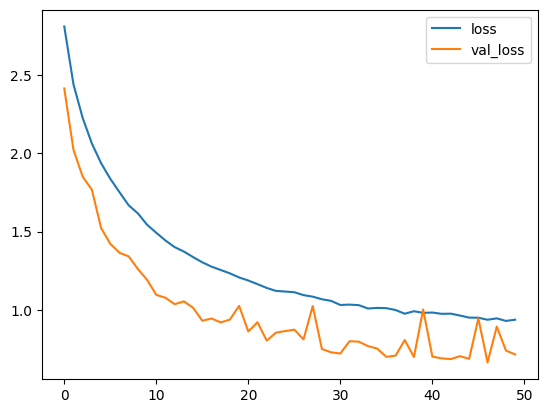

110/110 [==============================] - 151s 1s/step - loss: 0.9388 - accuracy: 0.7007 - val_loss: 0.7172 - val_accuracy: 0.7916


In [3]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=22000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=4400 // batch_size,
        verbose=1,
        callbacks=[plot_losses])

In [4]:
model.evaluate_generator(validation_generator)

C:\Users\sandr\AppData\Local\Temp\ipykernel_11948\3378472596.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.717205822467804, 0.7915909290313721]

Accuracy: 0.7915909290313721

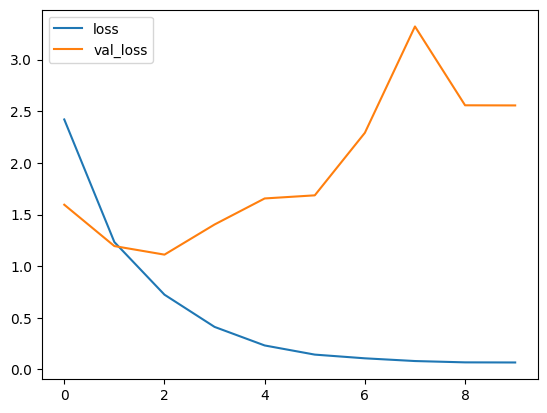

220/220 [==============================] - 56s 252ms/step - loss: 0.0677 - accuracy: 0.9848 - val_loss: 2.5565 - val_accuracy: 0.7620


C:\Users\sandr\AppData\Local\Temp\ipykernel_7192\310944547.py:81: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[2.5564849376678467, 0.7620454430580139]

In [2]:
model = Sequential()
model.add(Conv2D(64,                      #Anzahl der Filter
                 kernel_size=(3,3),         #Dimensionen des Fensters
                 strides=(1,1),             #Größe der Schritte
                 padding='same',            #Padding: same=dim(in)=dim(out), valid=no Padding
                 activation='relu',         #Aktivierungsfunktion
                 input_shape=(200,200,3)))    #Dimension des Inputs)
#model.add(Dropout(0.05))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.05))
model.add(Dense(22, activation='softmax'))

#Adam
myAdam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

#RMS Prop
myRMSprop=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

#Stochastic gradient descent
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True) #Parameter beim SGD Lernrate, Momentum, ...

model.compile(loss='categorical_crossentropy',
              optimizer=myRMSprop,
              metrics=['accuracy'])


batch_size = 100

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        #rotation_range=10, # Rotation
        #width_shift_range=0.2, # horizontaler Shift
        #height_shift_range=0.2, # vertikaler Shift
        #zoom_range=0.2, # zoom
        #horizontal_flip=True
)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'D:/KI_Plankton/data/train',  # this is the target directory
        target_size=(200, 200),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'D:/KI_Plankton/data/validation',
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical')


history = model.fit_generator(
        train_generator,
        #steps_per_epoch=22000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        #validation_steps=4400 // batch_size,
        verbose=1,
        callbacks=[plot_losses])


model.evaluate_generator(validation_generator)

Accuracy:0.7620454430580139, aber overfitted extrem! 

Da das Modell overfitted ist probieren wir noch einmal ein anderes Modell und benutzen diesmal data augmentation und dropout.

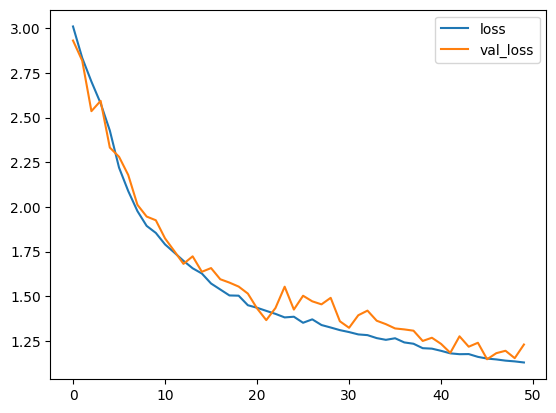

275/275 [==============================] - 146s 530ms/step - loss: 1.1301 - accuracy: 0.6345 - val_loss: 1.2305 - val_accuracy: 0.6075


C:\Users\sandr\AppData\Local\Temp\ipykernel_15276\2470005934.py:80: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[1.2304532527923584, 0.6075000166893005]

In [2]:
model = Sequential()
model.add(Conv2D(64,                      #Anzahl der Filter
                 kernel_size=(3,3),         #Dimensionen des Fensters
                 strides=(1,1),             #Größe der Schritte
                 padding='same',            #Padding: same=dim(in)=dim(out), valid=no Padding
                 activation='relu',         #Aktivierungsfunktion
                 input_shape=(200,200,3)))    #Dimension des Inputs)
model.add(Dropout(0.05))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(220, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(22, activation='softmax'))

#Adam
myAdam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

#RMS Prop
myRMSprop=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

#Stochastic gradient descent
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True) #Parameter beim SGD Lernrate, Momentum, ...

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


batch_size = 80

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10, # Rotation
        width_shift_range=0.2, # horizontaler Shift
        height_shift_range=0.2, # vertikaler Shift
        zoom_range=0.2, # zoom
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'D:/KI_Plankton/data/train',  # this is the target directory
        target_size=(200, 200),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'D:/KI_Plankton/data/validation',
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical')


history = model.fit_generator(
        train_generator,
        steps_per_epoch=22000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=4400 // batch_size,
        verbose=1,
        callbacks=[plot_losses])


model.evaluate_generator(validation_generator)

Accuracy: 0.6075000166893005

Ein anderer Versuch mit einem vortrainiertem CNN von keras:

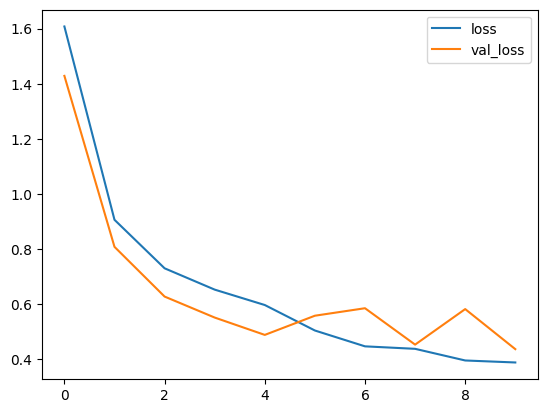

1100/1100 [==============================] - 403s 367ms/step - loss: 0.3874 - accuracy: 0.8811 - val_loss: 0.4358 - val_accuracy: 0.8745


C:\Users\sandr\AppData\Local\Temp\ipykernel_20448\2773664970.py:70: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.435840904712677, 0.8745454549789429]

In [2]:
#pretrained keras efficientnet
#Defining the model
base_model = EfficientNetB5(include_top=False, weights="imagenet", input_shape=(200,200,3), classes=22)

model = Sequential()
model.add(base_model)
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(128, activation='relu'))
model.add(Dense(22, activation='softmax'))

#Adam
myAdam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

#RMS Prop
myRMSprop=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

#Stochastic gradient descent
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.8, nesterov=True) #Parameter beim SGD Lernrate, Momentum, ...

model.compile(loss='categorical_crossentropy',
              optimizer=myAdam,
              metrics=['accuracy'])


batch_size = 20

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        #rotation_range=10, # Rotation
        #width_shift_range=0.2, # horizontaler Shift
        #height_shift_range=0.2, # vertikaler Shift
        #zoom_range=0.2, # zoom
        #horizontal_flip=True
)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'D:/KI_Plankton/data/train',  # this is the target directory
        target_size=(200, 200),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'D:/KI_Plankton/data/validation',
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical')


history = model.fit_generator(
        train_generator,
        #steps_per_epoch=22000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        #validation_steps=4400 // batch_size,
        verbose=1,
        callbacks=[plot_losses])


model.evaluate_generator(validation_generator)

Hiermit haben wir unser bestes Modell, die acuracy beträgt 0.8745454549789429

## <span style="color:rgb(166, 212, 46)">III. Conclusion</span>

Mit dem Convolutional Neural Network haben mir eine Methode gefunden, mit der wir die einzelnen Planktonbilder ziemlich genau ihrer korrekten Spezies zuordnen können.<br>Ganz perfekt wird und soll so ein Algorithmus wohl nie werden, mit einer accuracy von 87% sind wir aber eh sehr gut dabei.<br>


Als abschließenden Kommentar sei gesagt, dass alle notebooks, Programme und Dateien die wir im Laufe unserer Projektarbeit genutzt und getestet haben auf Github hochgeladen sind. Zwar zugegeben nicht ganz so gut geordnet, aber hier wird noch einmal ersichtlich, wie wir vorgegangen sind und was wir alles zusätzlich zu diesem Notebook hier getestet haben. 

Hier der Link: https://github.com/xShadoow/ml-plankton